In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow import keras

from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('Abandono_clientes.csv')

print(df.shape)
df.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.drop(df.columns[[0, 1, 2]], axis = 1, inplace=True)

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.isna().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

0    7963
1    2037
Name: Exited, dtype: int64


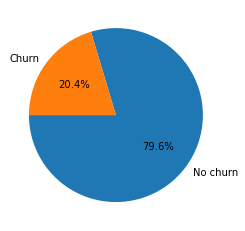

In [6]:
churn_rate = df['Exited'].value_counts()

print(churn_rate)

plt.pie(churn_rate, 
        labels=['No churn','Churn'], 
        startangle=180, 
        autopct='%1.1f%%')

plt.show()

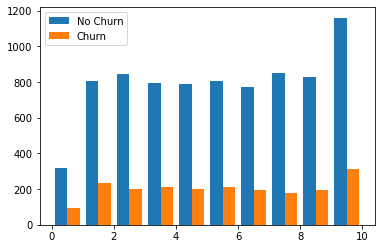

In [7]:
plt.hist([df[df.Exited == 0].Tenure, df[df.Exited == 1].Tenure], label=['No Churn', 'Churn'])
plt.legend()
plt.show()

Fazer mais algumas vizualizações

In [8]:
df['Gender'].replace({'Female':1, 'Male':0}, inplace = True)

In [9]:
df['Gender'].unique()

array([1, 0], dtype=int64)

In [10]:
df = pd.get_dummies(data=df, columns=['Geography'])
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [11]:
df.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [12]:
to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = MinMaxScaler()

df[to_scale] = scaler.fit_transform(df[to_scale])

In [13]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [257]:
x = df.drop('Exited', axis='columns')
y = df['Exited']

In [205]:
def ann(x_train, y_train, x_test, y_test):
    model = keras.Sequential([
        keras.layers.Dense(12, input_shape=(12,), activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(7, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation='sigmoid'), 
    ])

    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    model.fit(x_train, y_train, epochs=70)

    y_pred = model.predict(x_test)
    y_pred = np.round(y_pred)

    print(classification_report(y_test, y_pred))
    
    print(model.evaluate(x_test, y_test))
    
    return y_pred

Dataframe imbalanced:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

y_pred = ann(x_train, y_train, x_test, y_test)

SMOTE Oversampling:

In [262]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

smt = SMOTE(sampling_strategy = 'minority')
x_smote, y_smote = smt.fit_resample(x_train, y_train)

y_pred = ann(x_smote, y_smote, x_test, y_test)

Epoch 1/70
398/398 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.5421
Epoch 2/70
398/398 [==============================] - 0s 1ms/step - loss: 0.6511 - accuracy: 0.6165
Epoch 3/70
398/398 [==============================] - 0s 987us/step - loss: 0.6257 - accuracy: 0.6559
Epoch 4/70
398/398 [==============================] - 0s 957us/step - loss: 0.6027 - accuracy: 0.6731
Epoch 5/70
398/398 [==============================] - 1s 1ms/step - loss: 0.5842 - accuracy: 0.6924
Epoch 6/70
398/398 [==============================] - 0s 1ms/step - loss: 0.5727 - accuracy: 0.7030
Epoch 7/70
398/398 [==============================] - 0s 1ms/step - loss: 0.5691 - accuracy: 0.7094
Epoch 8/70
398/398 [==============================] - 0s 929us/step - loss: 0.5608 - accuracy: 0.7151
Epoch 9/70
398/398 [==============================] - 1s 1ms/step - loss: 0.5597 - accuracy: 0.7212
Epoch 10/70
398/398 [==============================] - 1s 1ms/step - loss: 0.5552 - accuracy: 

### SMOTE with Random Forest Classifier

In [263]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

smt = SMOTE(sampling_strategy=1, random_state=6)

x_smote, y_smote = smt.fit_resample(x_train, y_train)

print (np.unique(y_train, return_counts=True) , np.bincount(y_smote))
print('\n')

# create model variables
model = RandomForestClassifier()
# fit the model on smoted trainign data
result = model.fit(x_smote, y_smote)
# make predictions
y_pred = model.predict(x_test)

# compute classification report
print(classification_report(y_test, y_pred))

(array([0, 1], dtype=int64), array([6370, 1630], dtype=int64)) [6370 6370]


              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1593
           1       0.63      0.61      0.62       407

    accuracy                           0.85      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.85      0.85      0.85      2000



<AxesSubplot:>

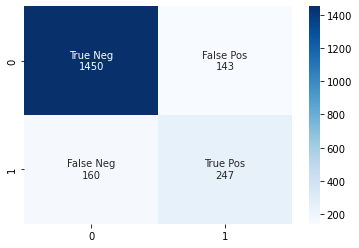

In [276]:
cfm = confusion_matrix(y_test, y_pred)

names = ['True Neg','False Pos','False Neg','True Pos']
counts = ["{0:0.0f}".format(value) for value in
                cfm.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(names,counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cfm, annot=labels, 
            fmt='', cmap='Blues')

In [306]:
df_test = pd.read_csv('Abandono_teste.csv', sep=';')

df_test.drop(df_test.columns[[0, 1, 2]], axis = 1, inplace=True)
df_test['Gender'].replace({'Female':1, 'Male':0}, inplace = True)
df_test = pd.get_dummies(data=df_test, columns=['Geography'])
df_test[to_scale] = scaler.fit_transform(df_test[to_scale])

df_test_pred = model.predict(df_test)
row_num = np.array(range(len(df_test_pred)))
df_final = np.column_stack((row_num, df_test_pred))

df_final = pd.DataFrame(df_final)
df_final.to_excel(excel_writer = "Abandono_teste_prediction.xlsx", header = ['rowNumber', 'predictedValues'], index = False)

#with open("Abandono_teste_previsao.csv","w+") as my_csv:
    #csvWriter = csv.writer(my_csv,delimiter=',')
    #csvWriter.writerows(df_final)

print(df_final)

       0  1
0      0  0
1      1  0
2      2  0
3      3  0
4      4  0
..   ... ..
995  995  0
996  996  1
997  997  1
998  998  0
999  999  0

[1000 rows x 2 columns]


AttributeError: 'numpy.ndarray' object has no attribute 'type'